# Feature Selection

- Bytes
>   - ngram_1gram => 80개
    - ngram_2gram => 150개
    - str_len => 90개
    - str_misc => 80개
    - str_sym => 21개 (그대로)
    - haralick => 44개

- Asm
>   - pe_info => 38개 (그대로)
    - section_name_freq => 38개 (그대로)
    - exec_section_name_freq => 18개 (그대로)
    - section_info => 10개 (그대로)
    - section_entropy => 4개 (그대로)
    - dll_freq => 16개 (그대로)
    - api_freq => 111개
    - opcode_freq => 50개
    - func_cnt => 6개 (그대로)
    - resgister_freq => 29개 (그대로)
    - dd_freq => 3개 (그대로)
    - etc_info => 3개 (그대로)

# 모듈 로드

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

# x 데이터 로드

In [297]:
root_path = './data/result/'
bytes_ngram_1gram = pd.read_csv(root_path + 'feature_bytes_ngram_1gram.csv')[['hash','245', '173', '32', '134', '204', '231', '255', '113', '155', '48', '154', '222', '174', '175', '16', '117', '139', '167', '130', '59', '253', '116', '237', '64', '239', '149', '3', '106', '251', '6', '0', '15', '254', '153', '105', '157', '36', '162', '146', '166', '12', '133', '158', '131', '137', '77', '143', '233', '227', '4', '170', '5', '193', '250', '151', '86', '195', '1', '49', '196', '199', '171', '81', '89', '194', '85', '115', '123', '75', '110', '218', '20', '21', '198', '192', '93', '63', '226', '67', '159']]
bytes_ngram_2gram = pd.read_csv(root_path + 'feature_bytes_ngram_2gram.csv')[['hash','134.247', '134.72', '85.4', '42.134', '3.85', '66.115', '48.130', '72.134', '33.11', '6.3', '85.29', '73.99', '48.13', '11.48', '46.68', '58.47', '121.65', '46.99', '247.13', '9.42', '112.58', '97.69', '13.1', '48.9', '195.195', '128.14', '86.77', '43.6', '48.129', '13.6', '130.1', '251.160', '6.1', '113.181', '1.11', '192.192', '27.64', '255.252', '22.114', '255.40', '6.9', '186.186', '32.64', '36.48', '3.40', '91.91', '2.33', '1.5', '31.64', '10.13', '49.11', '35.64', '104.65', '215.215', '255.173', '1.29', '89.100', '113.108', '31.41', '32.83', '19.2', '255.74', '253.64', '8.111', '23.13', '51.50', '147.64', '97.72', '210.210', '146.64', '255.175', '7.128', '243.84', '99.65', '38.64', '109.47', '106.69', '77.121', '251.252', '17.183', '105.103', '99.36', '130.55', '9.6', '105.110', '139.226', '255.248', '189.189', '3.130', '110.116', '158.158', '69.98', '80.65', '100.108', '245.245', '255.243', '3.29', '255.111', '97.66', '11.7', '3.2', '55.2', '252.252', '17.64', '102.207', '0.128', '108.103', '75.73', '32.67', '49.48', '64.0', '75.95', '13.10', '10.111', '86.66', '70.107', '219.172', '46.114', '22.4', '18.64', '101.115', '89.66', '103.75', '113.65', '116.112', '90.84', '15.28', '255.234', '181.67', '10.115', '255.188', '101.116', '122.124', '176.64', '229.229', '24.48', '65.12', '255.166', '43.64', '32.32', '111.92', '255.253', '209.90', '77.99', '100.101', '137.22', '80.114', '17.213', '95.105', '47.99']]
bytes_str_len = pd.read_csv(root_path + 'feature_bytes_str_len.csv')[['hash','stringLenCounts_3', 'stringLenCounts_6', 'stringLenCounts_4', 'stringLenCounts_2', 'stringLenCounts_0_10', 'stringLenCounts_34', 'stringLenCounts_12', 'stringTotalLen', 'stringLenCounts_1', 'stringLenCounts_62', 'stringLenCounts_5', 'stringLenCounts_30_60', 'stringLenCounts_25', 'stringLenCounts_10_30', 'stringLenCounts_9', 'stringLenCounts_8', 'stringLenCounts_10', 'stringLenCounts_7', 'stringLenCounts_32', 'stringLenCounts_14', 'stringLenCounts_21', 'stringLenCounts_50', 'stringLenCounts_11', 'stringLenCounts_26', 'stringLenCounts_13', 'stringLenCounts_16', 'stringLenCounts_49', 'stringLenCounts_18', 'stringLenCounts_40', 'stringLenCounts_36', 'stringLenCounts_19', 'stringLenCounts_23', 'stringLenCounts_17', 'stringLenCounts_55', 'stringLenCounts_27', 'stringLenCounts_15', 'stringLenCounts_24', 'stringLenCounts_28', 'stringLenCounts_22', 'stringLenCounts_48', 'stringLenCounts_60_90', 'stringLenCounts_29', 'stringLenCounts_39', 'stringLenCounts_20', 'stringLenCounts_41', 'stringLenCounts_38', 'stringLenCounts_42', 'stringLenCounts_46', 'stringLenCounts_31', 'stringLenCounts_30', 'stringLenCounts_90_inf', 'stringLenCountsMore100', 'stringLenCounts_33', 'stringLenCounts_35', 'stringLenCounts_53', 'stringLenCounts_52', 'stringLenCounts_66', 'stringLenCounts_43', 'stringLenCounts_54', 'stringLenCounts_45', 'stringLenCounts_61', 'stringLenCounts_73', 'stringLenCounts_71', 'stringLenCounts_64', 'stringLenCounts_74', 'stringLenCounts_37', 'stringLenCounts_47', 'stringLenCounts_44', 'stringLenCounts_63', 'stringLenCounts_70', 'stringLenCounts_51', 'stringLenCounts_67', 'stringLenCounts_76', 'stringLenCounts_68', 'stringLenCounts_60', 'stringLenCounts_69', 'stringLenCounts_58', 'stringLenCounts_59', 'stringLenCounts_95', 'stringLenCounts_57', 'stringLenCounts_77', 'stringLenCounts_90', 'stringLenCounts_56', 'stringLenCounts_65', 'stringLenCounts_72', 'stringLenCounts_84', 'stringLenCounts_94', 'stringLenCounts_75', 'stringLenCounts_79', 'stringLenCounts_81']]
bytes_str_misc = pd.read_csv(root_path + 'feature_bytes_str_misc.csv')[['hash','jz', 'malloc', 'kernel', 'DLL', 'dd', 'dw', 'free', 'lea', 'dll', 'public', 'alloc', '.exe', 'security', 'user', 'db', 'init', '.dll', 'microsoft', 'windows', '__dllonexit', 'Virtual', 'code', 'exe', 'loc_', 'global', 'Software', 'rep', 'xml', 'handler', 'strlen', 'gdi', 'memcpy', 'proc', 'move', 'format', 'error', 'reg', 'load', 'arg', 'cmp', 'heap', 'file', 'add', 'fmode', 'esi', 'CurrentVersion', 'int', 'failed', 'loc', 'tls', 'config', 'inc', 'word', 'std', 'unk', 'environment', 'switch', 'resource', 'icm', 'DATA', 'Offset', 'src', 'sub', 'esp', 'call', 'var', 'close', 'calloc', 'dec', 'struct', 'thread', 'virtual', 'rva', 'BOOL', 'create', 'off', 'char', 'system', 'ptr', 'byte']]
bytes_str_sym = pd.read_csv(root_path + 'feature_bytes_str_sym.csv')
bytes_img_haralick = pd.read_csv(root_path + 'feature_bytes_img_haralick.csv')[['hash','imgHaralick_12', 'imgHaralick_11', 'imgHaralick_8', 'imgHaralick_45', 'imgHaralick_32', 'imgHaralick_19', 'imgHaralick_31', 'imgHaralick_5', 'imgHaralick_38', 'imgHaralick_44', 'imgHaralick_18', 'imgHaralick_15', 'imgHaralick_6', 'imgHaralick_2', 'imgHaralick_10', 'imgHaralick_51', 'imgHaralick_41', 'imgHaralick_21', 'imgHaralick_25', 'imgHaralick_47', 'imgHaralick_28', 'imgHaralick_7', 'imgHaralick_1', 'imgHaralick_29', 'imgHaralick_4', 'imgHaralick_37', 'imgHaralick_3', 'imgHaralick_42', 'imgHaralick_34', 'imgHaralick_27', 'imgHaralick_33', 'imgHaralick_40', 'imgHaralick_14', 'imgHaralick_16', 'imgHaralick_50', 'imgHaralick_24', 'imgHaralick_36', 'imgHaralick_46', 'imgHaralick_20', 'imgHaralick_49', 'imgHaralick_23', 'imgHaralick_30', 'imgHaralick_43', 'imgHaralick_0']]
asm_pe_info = pd.read_csv(root_path + 'feature_asm_pe_info.csv').drop(['Sections'], axis=1)
asm_section_name_freq = pd.read_csv(root_path + 'feature_asm_section_name_freq.csv')
asm_exec_section_name_freq = pd.read_csv(root_path + 'feature_asm_exec_section_name_freq.csv')
asm_section_info = pd.read_csv(root_path + 'feature_asm_section_info.csv')
asm_section_entropy = pd.read_csv(root_path + 'feature_asm_section_entropy.csv')
asm_dll_freq = pd.read_csv(root_path + 'feature_asm_dll_freq.csv')
asm_api_freq = pd.read_csv(root_path + 'feature_asm_api_freq.csv')[['hash','isdebuggerpresent', 'getcurrentthreadid', 'unhandledexceptionfilter', 'exitprocess', 'terminateprocess', 'sleep', 'regclosekey', 'openprocess', 'getcurrentprocess', 'loadlibrarya', 'freelibrary', 'virtualalloc', 'translatemessage', 'fwrite', 'initializecriticalsection', 'virtualprotect', 'gettickcount', 'waitforsingleobject', 'setendoffile', 'findclose', 'widechartomultibyte', 'getlasterror', 'lockresource', 'mapviewoffile', 'writefile', 'multibytetowidechar', 'rtlunwind', 'virtualquery', 'getsysteminfo', 'getprocaddress', 'readfile', 'closehandle', 'heapdestroy', 'createthread', 'getstdhandle', 'virtualfree', 'fopen', 'getwindowthreadprocessid', 'deletecriticalsection', 'getcpinfo', 'getlocaltime', 'setfilepointer', 'interlockedincrement', 'getfilesize', 'tlsgetvalue', 'leavecriticalsection', 'getfiletype', 'heapfree', 'interlockeddecrement', 'releasemutex', 'getoemcp', 'heapcreate', 'createmutexa', 'entercriticalsection', 'getenvironmentstrings', 'tlssetvalue', 'flushfilebuffers', 'createmutexw', 'setstdhandle', 'getfilesizeex', 'internetclosehandle', 'exitthread', 'winexec', 'deviceiocontrol', 'isbadreadptr', 'terminatethread', 'sethandlecount', 'socket', 'createtoolhelp32snapshot', 'internetreadfile', 'getthreadcontext', 'recv', 'wsacleanup', 'isbadwriteptr', 'connect', 'wsastartup', 'send', 'closesocket', 'virtualallocex', 'openmutexa', 'writeprocessmemory', 'openfile', 'createremotethread', 'sendto', 'process32next', 'getupdaterect', 'accept', 'gethostname', 'readprocessmemory', 'setkeyboardstate', 'connectnamedpipe', 'gethostbyaddr', 'process32first', 'bind', 'listen', 'cryptencrypt', 'disconnectnamedpipe', 'enumprocesses', 'internetwritefile', 'getupdatergn', 'setfileapistoansi', 'internetquerydataavailable', 'internetgetconnectedstate', 'setfileapistooem', 'icmpsendecho', 'wsasend', 'certdeletecertificatefromstore', 'checkremotedebuggerpresent', 'setfilevaliddata', 'getbinarytype', 'openfilebyid']]
asm_opcode_freq = pd.read_csv(root_path + 'feature_asm_opcode_freq.csv')[['hash','pop', 'call', 'add', 'test', 'xor', 'and', 'mov', 'sub', 'push', 'retn', 'jnz', 'jz', 'jmp', 'movzx', 'leave', 'jle', 'dec', 'not', 'rol', 'inc', 'xchg', 'lea', 'imul', 'neg', 'pushf', 'nop', 'div', 'std', 'sbb', 'movsb', 'bt', 'fild', 'clc', 'setnl', 'cmpsb', 'setb', 'int', 'shld', 'jo', 'fdivp', 'fstcw', 'cmpsd', 'setle', 'outsd', 'bsr', 'scasw', 'aas', 'rdtsc', 'aad', 'loope']]
asm_func_cnt = pd.read_csv(root_path + 'feature_asm_func_cnt.csv')
asm_register_freq = pd.read_csv(root_path + 'feature_asm_register_freq.csv')
asm_dd_freq = pd.read_csv(root_path + 'feature_asm_dd_freq.csv')
asm_etc_info = pd.read_csv(root_path + 'feature_asm_etc_info.csv')
asm_img_bytes = pd.read_csv('./asm_img_train.csv')
asm_opcode_1g = pd.read_csv(root_path + 'feature_asm_opcode_1g.csv')[['hash','call', 'pop', 'add', 'mov', 'xor', 'retn', 'or', 'test', 'push', 'jmp', 'cmp', 'jz', 'sub', 'jnz', 'jb', 'and', 'dec', 'shr', 'inc', 'jle', 'lea', 'movzx', 'leave', 'js', 'rol', 'ja', 'not', 'xchg', 'imul', 'jl', 'jnb', 'shl', 'setz', 'jns', 'neg', 'jge', 'movsx', 'pushf', 'jbe', 'nop', 'stosd', 'adc', 'jg', 'sar', 'pusha', 'sbb', 'wait', 'setnz', 'sahf', 'movsb', 'movsd', 'cdq', 'div', 'scasb', 'fnclex', 'idiv', 'clc', 'bt', 'mul', 'setnle', 'fild', 'fld', 'cmc', 'faddp', 'popa', 'fstp', 'fnstsw', 'fldcw', 'fmul', 'cmpsb', 'xadd', 'int', 'fsubp', 'fcomp', 'ror', 'shrd', 'fmulp', 'jo', 'fadd', 'fldz', 'setl', 'callvirt', 'ldarg.1', 'fdiv', 'fsub', 'stloc.0', 'cvtps2pd', 'in', 'bts', 'fsubr', 'shld', 'endfinally', 'ldloc.1', 'fst', 'movdqa', 'bswap', 'stloc.1', 'jp', 'cmovnz', 'ldarg.0']]
asm_opcode_2g = pd.read_csv(root_path + 'feature_asm_opcode_2g.csv')[['hash','.', 'retn.', 'mov.mov', 'push.call', 'call.pop', 'jmp.', 'push.retn', '.mov', 'mov.push', 'call.call', 'jz.push', 'push.push', 'inc.push', 'add.mov', 'mov.test', 'mov.jmp', 'xor.call', 'jz.test', 'push.mov', 'mov.or', 'mov.call', 'xor.pop', 'jmp.mov', 'test.jz', 'push.sub', 'pop.pop', 'or.jz', 'pop.retn', 'mov.jnz', 'call.mov', '.jmp', 'add.retn', 'mov.pushf', 'add.jmp', 'mov.retn', 'jz.mov', 'add.test', 'mov.add', 'lea.cmp', 'call.add', 'jmp.jmp', 'mov.jz', 'leave.retn', 'xor.cmp', 'pop.mov', 'sub.mov', 'jz.pop', 'cmp.jb', 'pop.push', 'dec.jnz', 'mov.pop', 'test.jnz', 'pop.leave', 'jnz.push', 'lea.test', 'mov.xor', 'jnz.cmp', 'pop.inc', 'retn.mov', 'call.xor', 'mov.jg', 'inc.dec', 'sub.sub', '.pop', 'jz.jmp', 'inc.mov', 'movzx.inc', 'pop.jz', 'cmp.jz', 'mov.sub', 'retn.pop', 'jz.cmp', 'pop.test', 'mov.lea', 'xor.mov', 'retn.push', 'call.', 'lea.mov', 'lea.jmp', 'lea.push', 'jnz.mov', '.push', 'cmp.jnz', 'add.sub', 'call.push', 'pop.sub', 'xor.retn', 'xor.jmp', 'mov.inc', 'jmp.push', 'test.mov', 'test.js', 'retn.jmp', 'movzx.shl', 'cmp.pop', 'or.mov', 'js.mov', 'sub.push', 'xor.inc', 'add.cmp']]
asm_opcode_3g = pd.read_csv(root_path + 'feature_asm_opcode_3g.csv')
asm_opcode_4g = pd.read_csv(root_path + 'feature_asm_opcode_4g.csv')
asm_reg_2g = pd.read_csv(root_path + 'feature_asm_register_2g.csv')
asm_reg_3g = pd.read_csv(root_path + 'feature_asm_register_3g.csv')
asm_reg_4g = pd.read_csv(root_path + 'feature_asm_register_4g.csv')

In [474]:
asm_inst_1g = pd.read_csv(root_path + 'feature_asm_inst_1g.csv')
asm_inst_2g = pd.read_csv(root_path + 'feature_asm_inst_2g.csv')
asm_inst_3g = pd.read_csv(root_path + 'feature_asm_inst_3g.csv')
asm_inst_4g = pd.read_csv(root_path + 'feature_asm_inst_4g.csv')

In [475]:
le = LabelEncoder()
le.fit(list(asm_etc_info['first_addr'].values))
asm_etc_info['first_addr'] = le.transform(list(asm_etc_info['first_addr'].values))

In [476]:
feature_set = [bytes_ngram_1gram, bytes_ngram_2gram, bytes_str_len, bytes_str_misc, 
               bytes_str_sym, bytes_img_haralick, asm_pe_info, asm_section_name_freq, 
               asm_exec_section_name_freq, asm_section_info, asm_section_entropy, asm_dll_freq, 
               asm_api_freq, asm_opcode_freq, asm_func_cnt, asm_register_freq, asm_dd_freq, asm_etc_info, asm_img_bytes,
               asm_opcode_1g, asm_opcode_2g, asm_opcode_3g, asm_opcode_4g,
               asm_reg_2g, asm_reg_3g, asm_reg_4g,
               asm_inst_1g, asm_inst_2g, asm_inst_3g, asm_inst_4g]

In [477]:
feature_set_name = ['1gram', '2gram', 'len', 'misc', 'sym', 'haralick', 'pe', 'section_name_freq', 'exec_section_name_freq', 'section_info', 'section_entropy', 'dll_freq', 'api_freq', 'opcode', 'func', 'register', 'dd', 'etc', 'asm_img_bytes', 'op1g', 'op2g', 'op3g', 'op4g', 'reg2', 'reg3', 'reg4', 'inst1', 'inst2', 'inst3', 'inst4']

# y 데이터 로드

In [478]:
y_data = pd.read_excel('./data/label.xlsx').sort_values(by='hash')
label = y_data['hash'].to_frame()
is_mal = y_data['is_mal'].to_frame()

# 여러가지 util function 들

In [479]:
def pre_processing(feature_set, label):
    result = []
    
    # 각 피처들에 대해 접근
    for features in feature_set:
        # 오름차순 정렬 by hash
        features = features.sort_values(by='hash')
        
        # 레이블에 맞추기
        features = pd.merge(label, features, how='left', on='hash')
        
        # 널데이터 처리
        features = features.fillna(0)
        
        result.append(features)
    
    return result

In [480]:
def feature_concat(*argv):
    temp = argv[0]
    for i, features in enumerate(argv):
        if i == 0:
            continue
        temp = pd.merge(temp, features, on='hash', how='left')
    
    return temp

In [481]:
def get_cv_score(x_data, y_data, model, k):
    
    cv = KFold(k, shuffle=True, random_state=0)
    
    train_score = []
    cv_score = []
    
    for idx_train, idx_test in cv.split(X=x_data, y=y_data):
        
        x_train = x_data.iloc[idx_train]
        x_test = x_data.iloc[idx_test]
        y_train = is_mal.iloc[idx_train]
        y_test = is_mal.iloc[idx_test]

        model.fit(x_train, y_train)
        
        train_score.append(model.score(x_train, y_train))
        cv_score.append(model.score(x_test, y_test))
    
    return train_score, cv_score

In [482]:
def select_important_feautre(columns, feature_importance, num):
    
    #딕셔너리
    dic = {}
    for value in [list(v) for v in zip(columns, feature_importance)]:
        dic[str(value[1])] = value[0] 
    
    #피처 중요도
    f_i = list(feature_importance)
    f_i.sort(reverse=True)
    
    
    #n개 뽑기
    result = []
    for i in range(0, num):
        result.append(dic[str(f_i[i])])
    
    return result

In [483]:
def devide_size(feature):
    feature = copy.copy(feature)
    for col in feature.columns:
        if col == 'hash':
            continue
            
        feature[col] = feature[col] / (feature_set[17]['number_of_lines'] + 1)
    
    return feature

In [484]:
def std_data(feature):
    feature = copy.copy(feature)
    for col in feature.columns:
        if col == 'hash':
            continue
        
        feature[col] = (feature[col] - feature[col].mean()) / feature[col].std()
    
    return feature

# 선처리

In [485]:
feature_set = pre_processing(feature_set, label)

# 피처 엔지니어링

In [152]:
x_data = feature_concat(feature_set[6], feature_set[10], feature_set[15], feature_set[9], feature_set[14], feature_set[13], feature_set[7], feature_set[12], feature_set[3], feature_set[8], feature_set[11], feature_set[16], y_data).drop(['hash'], axis = 1)

###### Address of Entrypoint

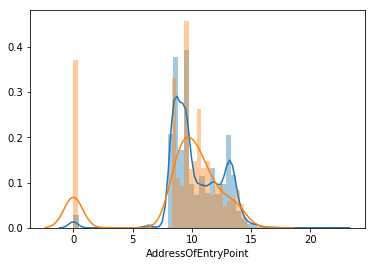

In [129]:
sns.distplot(np.log(x_data.AddressOfEntryPoint[x_data.is_mal == 1] + 1))
sns.distplot(np.log(x_data.AddressOfEntryPoint[x_data.is_mal == 0] + 1))

In [92]:
pd.crosstab(x_data.AddressOfEntryPoint, columns='cnt').sort_values(by='cnt', ascending=False)

col_0,cnt
AddressOfEntryPoint,
0.000000,492
8.318010,390
13.284334,228
9.461955,215
9.436599,186
8.523772,128
11.912084,109
9.157467,103
9.603733,77


In [132]:
x_data.AddressOfEntryPoint = np.log(x_data.AddressOfEntryPoint + 1)

In [133]:
def temp(v):
    if v <= 5:
        return 0
    elif v <= 9.5:
        return 1
    elif v <= 13:
        return 2
    else:
        return 3

In [134]:
x_data['AddressOfEntryPoint'] = x_data['AddressOfEntryPoint'].map(temp)

##### 테스트

In [135]:
x_data.head(1)

,AddressOfEntryPoint,Characteristics,CheckSum,DebugSize,ExportSize,FileAlignment,GeneratedCheckSum,IatRva,ImageBase,Machine,...,shlwapi,urlmon,user32,wininet,ws2_32,wsock32,db_y,dd_y,dw_y,is_mal
0,2,8450.0,60881.0,0.0,0.0,4096.0,96371.0,30464.0,4194304.0,332.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [136]:
x_data = x_data.drop(['is_mal'], axis = 1)

In [137]:
for i in [1,2,3,4,42]:
    rf = RandomForestClassifier(n_estimators=500, random_state=i, n_jobs=-1, max_depth=28)
    train_score, cv_score = get_cv_score(x_data=x_data, y_data=is_mal, k=5, model=rf)
    print("[{}] => train: {} cv: {}".format(i, np.mean(train_score), np.mean(cv_score)))

[1] => train: 0.9999749999999998 cv: 0.9524000000000001
[2] => train: 1.0 cv: 0.9528000000000001
[3] => train: 1.0 cv: 0.9524000000000001
[4] => train: 1.0 cv: 0.953
[42] => train: 1.0 cv: 0.9538


###### 피처 중요도

In [109]:
values = np.array([list(v) for v in sorted(zip(x_data.columns, rf.feature_importances_), key=lambda x: x[1] * -1)])
imp = pd.DataFrame(values[:,1], index = values[:,0], columns=["feature_importance"])
imp.feature_importance = imp.feature_importance.astype(float)

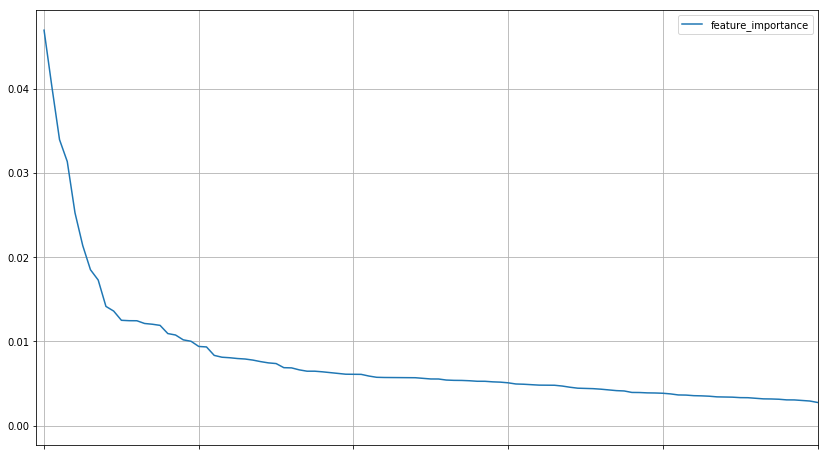

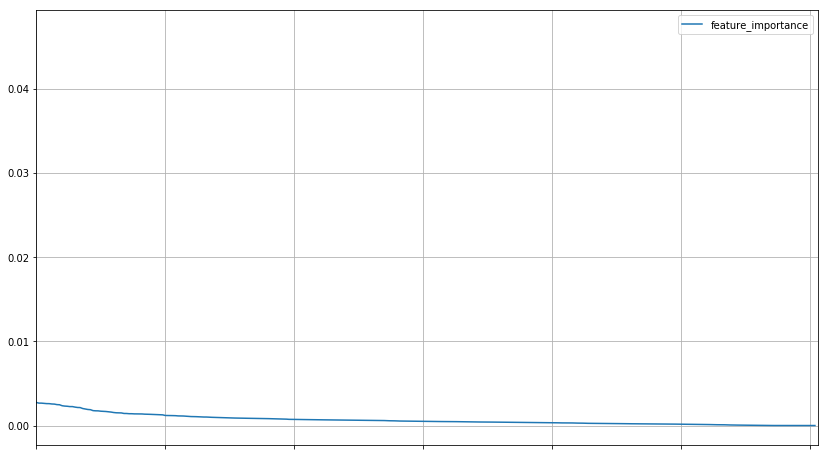

In [81]:
num = 100
imp.plot(figsize=(14,8), grid=True, xlim=(-1,num))
imp.plot(figsize=(14,8), grid=True, xlim=(num,len(x_data.columns)))

## 피처엔지니어링 - 피처 셋들 사이

In [171]:
for i, name in enumerate(feature_set_name):
    print(i, name)

0 1gram
1 2gram
2 len
3 misc
4 sym
5 haralick
6 pe
7 section_name_freq
8 exec_section_name_freq
9 section_info
10 section_entropy
11 dll_freq
12 api_freq
13 opcode
14 func
15 register
16 dd
17 etc
18 asm_img_bytes
19 op1g
20 op2g
21 op3g
22 op4g


In [172]:
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, max_depth=28)

In [210]:
for num in range(18):
    x_data = feature_concat(feature_set[6], feature_set[10], feature_set[15], feature_set[9], feature_set[14], feature_set[3], feature_set[num]).drop(['hash'], axis = 1)
    train_score, cv_score = get_cv_score(x_data=x_data, y_data=is_mal, k=5, model=rf)
    print("========[{}]========".format(feature_set_name[num]))
    print("train list : {}".format(train_score))
    print("cv list : {}".format(cv_score))
    print("train: {} \n cv: {}".format(np.mean(train_score), np.mean(cv_score)))
    print("\n")

========[1gram]========
train list : [1.0, 1.0, 1.0, 1.0, 1.0]
cv list : [0.941, 0.943, 0.9505, 0.9345, 0.938]
train: 1.0 
 cv: 0.9414


========[2gram]========
train list : [1.0, 1.0, 1.0, 1.0, 1.0]
cv list : [0.9465, 0.949, 0.944, 0.943, 0.944]
train: 1.0 
 cv: 0.9452999999999999


========[len]========
train list : [1.0, 1.0, 1.0, 1.0, 1.0]
cv list : [0.9455, 0.95, 0.956, 0.938, 0.949]
train: 1.0 
 cv: 0.9476999999999999


========[misc]========
train list : [1.0, 1.0, 1.0, 1.0, 1.0]
cv list : [0.951, 0.951, 0.9565, 0.9475, 0.952]
train: 1.0 
 cv: 0.9516


========[sym]========
train list : [1.0, 1.0, 1.0, 1.0, 1.0]
cv list : [0.946, 0.948, 0.9515, 0.943, 0.945]
train: 1.0 
 cv: 0.9467000000000001


========[haralick]========
train list : [1.0, 1.0, 1.0, 1.0, 1.0]
cv list : [0.9455, 0.951, 0.9515, 0.9485, 0.945]
train: 1.0 
 cv: 0.9483


========[pe]========
train list : [1.0, 1.0, 1.0, 1.0, 1.0]
cv list : [0.9485, 0.9505, 0.958, 0.947, 0.953]
train: 1.0 
 cv: 0.9514000000000001


=

In [15]:
x_data = feature_concat(feature_set[6], feature_set[10], feature_set[15], feature_set[9], feature_set[14], feature_set[13], feature_set[7], feature_set[12], feature_set[3], feature_set[8], feature_set[11], feature_set[16]).drop(['hash'], axis = 1)

In [16]:
for num in range(40):
    rf = RandomForestClassifier(n_estimators=500, random_state=num, n_jobs=-1, max_depth=28)
    train_score, cv_score = get_cv_score(x_data=x_data, y_data=is_mal, k=5, model=rf)
    print("{} => train: {} \n cv: {}".format(num, np.mean(train_score), np.mean(cv_score)))
    print("\n")

0 => train: 1.0 
 cv: 0.9526


1 => train: 1.0 
 cv: 0.953


2 => train: 1.0 
 cv: 0.9534


3 => train: 1.0 
 cv: 0.9529




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\python\python3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-767f7b5cd919>", line 3, in <module>
    train_score, cv_score = get_cv_score(x_data=x_data, y_data=is_mal, k=5, model=rf)
  File "<ipython-input-10-14b23b280a7f>", line 15, in get_cv_score
    model.fit(x_train, y_train)
  File "c:\python\python3\lib\site-packages\sklearn\ensemble\forest.py", line 335, in fit
    for i, t in enumerate(trees))
  File "c:\python\python3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 996, in __call__
    self.retrieve()
  File "c:\python\python3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 899, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "c:\python\python3\lib\multiprocessing\pool.py", line 664, in get
    self.wait(timeout)
  File "c:\python\python3\lib\multiprocessing\pool.py", l

KeyboardInterrupt: 

In [243]:
rf = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1, max_depth=28)

In [244]:
x_data = feature_concat(feature_set[6], feature_set[10], feature_set[15], feature_set[9], feature_set[14], feature_set[13], feature_set[7], feature_set[12], feature_set[3], feature_set[8], feature_set[11], feature_set[16], feature_set[20]).drop(['hash'], axis = 1)
train_score, cv_score = get_cv_score(x_data=x_data, y_data=is_mal, k=5, model=rf)
print("========[{}]========".format(feature_set_name[14]))
print("train list : {}".format(train_score))
print("cv list : {}".format(cv_score))
print("train: {} \n cv: {}".format(np.mean(train_score), np.mean(cv_score)))
print("\n")

c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ip

========[func]========
train list : [1.0, 1.0, 0.999875, 0.999875, 1.0]
cv list : [0.951, 0.9555, 0.958, 0.9475, 0.953]
train: 0.9999499999999999 
 cv: 0.953




In [299]:
x_data.head(1)

,AddressOfEntryPoint,Characteristics,CheckSum,DebugSize,ExportSize,FileAlignment,GeneratedCheckSum,IatRva,ImageBase,Machine,...,shell32,shlwapi,urlmon,user32,wininet,ws2_32,wsock32,db_y,dd_y,dw_y
0,30542.0,8450.0,60881.0,0.0,0.0,4096.0,96371.0,30464.0,4194304.0,332.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
values = np.array([list(v) for v in sorted(zip(x_data.columns, rf.feature_importances_), key=lambda x: x[1] * -1)])
imp = pd.DataFrame(values[:,1], index = values[:,0], columns=["feature_importance"])
imp.feature_importance = imp.feature_importance.astype(float)

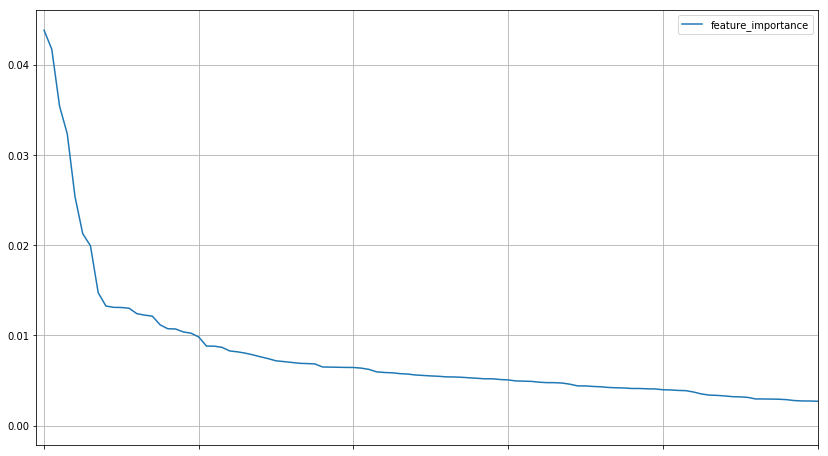

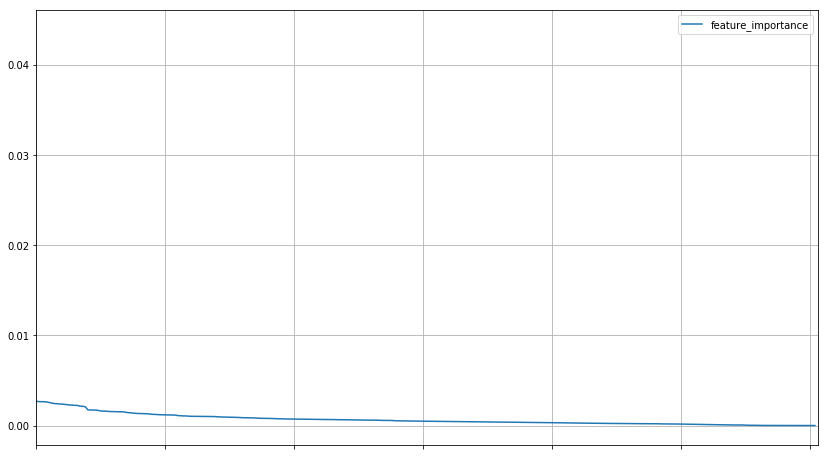

In [302]:
num = 100
imp.plot(figsize=(14,8), grid=True, xlim=(-1,num))
imp.plot(figsize=(14,8), grid=True, xlim=(num,len(x_data.columns)))

In [ ]:
x_data_t = x_data[imp.index[:num]]

rf = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1, max_depth=28)

train_score, cv_score = get_cv_score(x_data=x_data_t, y_data=is_mal, k=5, model=rf)
print(train_score)
print(cv_score)
print("train: {} \n cv: {}".format(np.mean(train_score), np.mean(cv_score)))

In [295]:
x_data_t = x_data[imp.index[:num]]

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1, max_depth=28)

In [296]:
train_score, cv_score = get_cv_score(x_data=x_data_t, y_data=is_mal, k=5, model=rf)
print(train_score)
print(cv_score)
print("train: {} \n cv: {}".format(np.mean(train_score), np.mean(cv_score)))

[1.0, 1.0, 1.0, 1.0, 1.0]
[0.954, 0.953, 0.957, 0.947, 0.952]
train: 1.0 
 cv: 0.9526


In [ ]:
0.953

## 개별 피처 엔지니어링

In [500]:
for i, name in enumerate(feature_set_name):
    print(i, name)

0 1gram
1 2gram
2 len
3 misc
4 sym
5 haralick
6 pe
7 section_name_freq
8 exec_section_name_freq
9 section_info
10 section_entropy
11 dll_freq
12 api_freq
13 opcode
14 func
15 register
16 dd
17 etc
18 asm_img_bytes
19 op1g
20 op2g
21 op3g
22 op4g
23 reg2
24 reg3
25 reg4
26 inst1
27 inst2
28 inst3
29 inst4


In [519]:
x_data = feature_concat(feature_set[29]).drop(['hash'], axis=1)

In [534]:
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, max_depth=42)

In [535]:
train_score, cv_score = get_cv_score(x_data=x_data, y_data=is_mal, k=2, model=rf)
# print("========[{}]========".format(feature_set_name[14]))
print("train list : {}".format(train_score))
print("cv list : {}".format(cv_score))
# print("train: {} \n cv: {}".format(np.mean(train_score), np.mean(cv_score)))
# print("\n")

c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


train list : [0.9282, 0.9394]
cv list : [0.8602, 0.875]


In [536]:
values = np.array([list(v) for v in sorted(zip(x_data.columns, rf.feature_importances_), key=lambda x: x[1] * -1)])
imp = pd.DataFrame(values[:,1], index = values[:,0], columns=["feature_importance"])
imp.feature_importance = imp.feature_importance.astype(float)

In [537]:
x_data.head(1)

,push.REG.push.REG.call.MEM.add.REG.VALUE,call.ADDR.add.REG.VALUE.test.REG.REG.jz.ADDR,jmp.MEM.jmp.MEM.jmp.MEM.jmp.MEM,call.MEM.add.REG.VALUE.test.REG.REG.jz.ADDR,push.VALUE.push.VALUE.push.VALUE.push.VALUE,push.VALUE.call.ADDR.add.REG.VALUE.test.REG.REG,test.REG.REG.jnz.ADDR.push.REG.push.REG,push.REG.push.REG.push.REG.push.REG,pop.REG.pop.REG.pop.REG.pop.REG,push.REG.call.MEM.add.REG.VALUE.test.REG.REG,...,mov.REG.MEM.add.REG.VALUE.mov.MEM.REG.mov.REG.MEM,retn.push.REG.push.REG.push.REG,mov.REG.MEM.mov.MEM.REG.mov.REG.MEM.mov.REG.MEM,add.REG.VALUE.test.REG.REG.jz.ADDR.push.REG,push.REG.push.REG.mov.REG.REG.call.ADDR,mov.REG.MEM.pop.REG.pop.REG.pop.REG,mov.MEM.VALUE.mov.MEM.VALUE.mov.MEM.VALUE.lea.REG.MEM,push.VALUE.call.ADDR.push.REG.call.ADDR,leave.retn.push.REG.mov.REG.REG,pop.REG.leave.retn.VALUE.push.REG
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


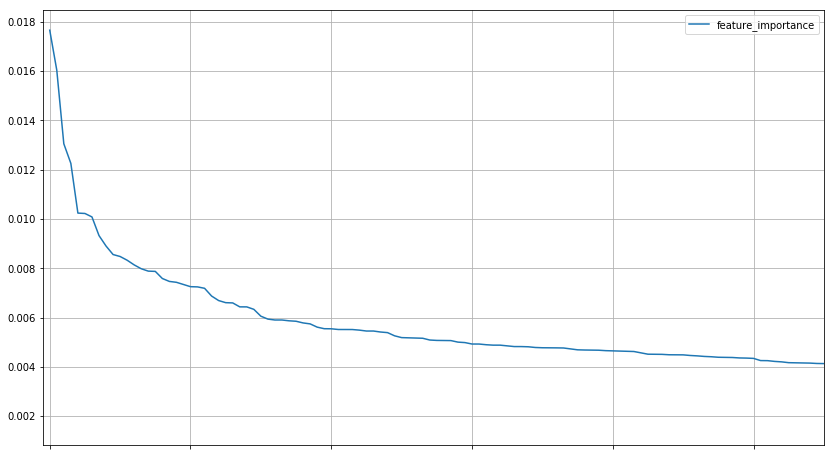

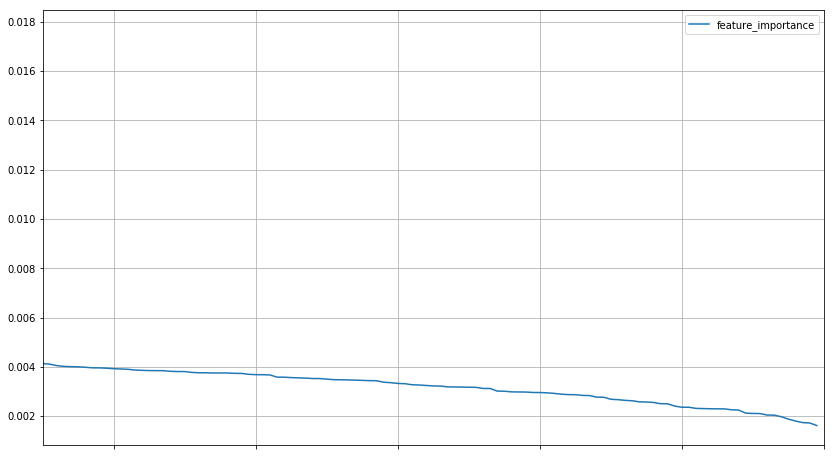

In [542]:
num = 110
imp.plot(figsize=(14,8), grid=True, xlim=(-1,num))
imp.plot(figsize=(14,8), grid=True, xlim=(num,len(x_data.columns)))

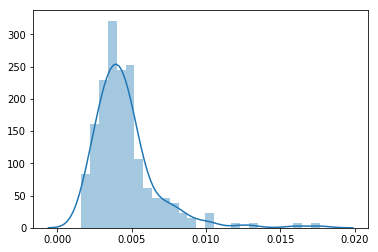

In [543]:
sns.distplot(imp)

In [544]:
imp[imp.feature_importance > 0]

,feature_importance
ret.ret.ret.ret,0.017661
push.REG.push.REG.call.MEM.add.REG.VALUE,0.016039
call.ADDR.add.REG.VALUE.test.REG.REG.jz.ADDR,0.013052
jmp.MEM.jmp.MEM.jmp.MEM.jmp.MEM,0.012256
push.VALUE.push.VALUE.push.VALUE.push.VALUE,0.010240
push.REG.push.REG.push.REG.push.REG,0.010224
pop.REG.pop.REG.pop.REG.pop.REG,0.010084
push.VALUE.push.VALUE.push.VALUE.call.ADDR,0.009327
ldnull.ceq.ldc.i4.0.ceq,0.008903
nop.nop.ret.nop,0.008558


In [545]:
x_data = x_data[imp.index[:num]]

In [546]:
get_cv_score(x_data, is_mal, rf, 2)

c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
c:\python\python3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


([0.9338, 0.938], [0.8734, 0.8706])

In [547]:
print(list(x_data.columns))

['ret.ret.ret.ret', 'push.REG.push.REG.call.MEM.add.REG.VALUE', 'call.ADDR.add.REG.VALUE.test.REG.REG.jz.ADDR', 'jmp.MEM.jmp.MEM.jmp.MEM.jmp.MEM', 'push.VALUE.push.VALUE.push.VALUE.push.VALUE', 'push.REG.push.REG.push.REG.push.REG', 'pop.REG.pop.REG.pop.REG.pop.REG', 'push.VALUE.push.VALUE.push.VALUE.call.ADDR', 'ldnull.ceq.ldc.i4.0.ceq', 'nop.nop.ret.nop', 'push.VALUE.call.ADDR.add.REG.VALUE.test.REG.REG', 'push.REG.mov.REG.REG.push.REG.push.REG', 'cmp.REG.VALUE.jz.ADDR.cmp.REG.VALUE.jz.ADDR', 'add.REG.VALUE.test.REG.REG.jz.ADDR.mov.REG.MEM', 'pop.REG.retn.mov.REG.REG.push.REG', 'call.ADDR.pop.REG.pop.REG.test.REG.REG', 'stfld.ETC.ret.ldarg.0.ldfld.ETC', 'mov.REG.MEM.test.REG.REG.jz.ADDR.mov.REG.MEM', 'test.REG.REG.jnz.ADDR.push.REG.push.REG', 'call.MEM.add.REG.VALUE.test.REG.REG.jz.ADDR', 'lea.REG.MEM.push.REG.push.REG.mov.REG.REG', 'mov.MEM.VALUE.mov.MEM.VALUE.mov.MEM.VALUE.mov.MEM.VALUE', 'ldstr.ETC.call.ETC.ldstr.ETC.call.ETC', 'ldarg.0.ldfld.ETC.ret.ldarg.0', 'ret.ldarg.0.ldfld.E

# 단일 파일 모델링 스코어 확인

In [ ]:
for i, features in enumerate(feature_set):
    rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, max_depth=28)
    x_train, x_test, y_train, y_test = train_test_split(features.drop(['hash'], axis=1), is_mal, test_size=0.3, random_state=0)
    rf.fit(x_train, y_train)
    print("[{}]: 정확도: {}".format(feature_set_name[i], rf.score(x_test, y_test)))

# 기타 등등

In [ ]:
feature_set_dict = {
    "bytes":{"ngram_1gram":bytes_ngram_1gram, "ngram_2gram":bytes_ngram_2gram, 
             "str_len":bytes_str_len, "str_misc":bytes_str_misc, "str_sym":bytes_str_sym, 
             "img_haralick":bytes_img_haralick},
    
    "asm":{"pe_info":asm_pe_info,
           "section_name_freq":asm_section_name_freq, "exec_section_name_freq":asm_exec_section_name_freq, "section_info":asm_section_info, "section_entropy":asm_section_entropy, 
           "dll_freq":asm_dll_freq, 
           "api_freq":asm_api_freq, 
           "opcode_freq":asm_opcode_freq, 
           "func_cnt":asm_func_cnt, 
           "register_freq":asm_register_freq, 
           "dd_freq":asm_dd_freq, 
           "etc_info":asm_etc_info}
}

In [ ]:
def dict_to_list(dic):
    
    # 그릇
    temp = []
    
    # 키만 가져와서 검사
    for key in dic.keys():
        
        #만약 키에 해당하는 값이 딕셔너리라면, 재귀함수
        if type(dic[key]) is dict:
            temp += dict_to_list(dic[key])
        
        # 아니라면 그릇에 객체 추가
        else:
            temp.append(dic[key])
    
    # 그릇 반환
    return temp